<a href="https://colab.research.google.com/github/JamesEckhartJr/Quantum-Hardware-Projects/blob/main/Add%20Cycles%20da_Vinci_Quantum_Emulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


OPENQASM 2.0;

qreg q[1];

creg c[1];

h q[0];

measure q[0] -> c[0];

Running cycle 1/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[0], [1], [1], [1], [1], [1], [0], [0], [1], [0]]}}
Running cycle 2/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[0], [0], [0], [1], [0], [1], [0], [0], [1], [1]]}}
Running cycle 3/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[0], [1], [1], [1], [1], [0], [0], [1], [0], [0]]}}
Running cycle 4/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[1], [0], [0], [1], [1], [0], [0], [1], [1], [0]]}}
Running cycle 5/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[1], [0], [0], [0], [0], [0], [1], [0], [1], [1]]}}
Running cycle 6/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[0], [1], [0], [0], [1], [1], [1], [0], [0], [0]]}}
Running cycle 7/10...
{'error': 'no error', 'error_code': 0, 'result': {'c': [[1], [1], [0], [1], [0], [1], [1], [1], [0], [0]]}}
Running cycle 8/10

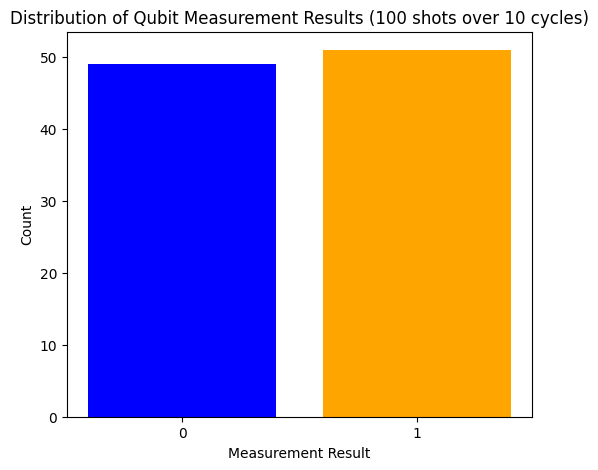

In [2]:
import json
import requests
import time
import matplotlib.pyplot as plt # Import matplotlib for plotting

#Suppress warnings (optional, but needed for visual output)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

da_Vinci_Quantum_Emulator = 'theq-ae31b1'

# "The noblest pleasure is the joy of understanding"
# "Il piacere più nobile è la gioia di comprendere"
#-- Leonardo da Vinci

#Start QASM -- text based language. Opens the same on every program.
program = """
OPENQASM 2.0;
"""

#Create 'Quantum Register' and specify the number of qubits -- in this
#case one qubit for coin toss. Quantum Circuit -- Single Line
program += """
qreg q[1];
"""

#Create 'Classical Register' where the results of measurements are stored.
#Classical Circuit -- Double Line
program += """
creg c[1];
"""

#Apply 'Quantum Instruction/Transformation' or 'Gate" to qubit using a Hadamard
#Gate -- a fundamental single-qubit quantum gate that creates a superposition of
# states. It transforms a qubit from a definite state (either |0⟩ or |1⟩) into an
# equal superposition of both |0⟩ and |1⟩, effectively creating a "maybe" state
# where both possibilities are explored simultaneously. This ability to create
#superpositions is crucial for the power of quantum algorithms.
program += """
h q[0];
"""

#Next we 'read' or 'measure' the qubit and store the bit value in a classical
#register
program += """
measure q[0] -> c[0];
"""

print(program)

#Quantum Emulator address
request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(da_Vinci_Quantum_Emulator)

all_measurements = [] # List to store all measurements

for i in range(10): # Run for 10 cycles
    print(f"Running cycle {i+1}/10...")
    #Create Dictionary
    data = {
        'script': program,
        'count': 10 #shots
    }

    #Send Request
    result = requests.post(request_http, json=data, verify=False)

    # Check for successful response status code
    if result.status_code == 200:
        try:
            #Load Into Python Dictionary
            json_obj = json.loads(result.content)

            #Print keys and entries
            print(json_obj)

            # Extract measurements and flatten the list of lists
            if 'result' in json_obj and 'c' in json_obj['result']:
                current_measurements = [item for sublist in json_obj['result']['c'] for item in sublist]
                all_measurements.extend(current_measurements)
            else:
                print(f"Warning: 'result' or 'c' key not found in JSON response for cycle {i+1}.")
                print(f"Full response: {json_obj}")

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON for cycle {i+1}: {e}")
            print(f"Raw response content: {result.content}")
        except Exception as e:
            print(f"An unexpected error occurred during JSON processing for cycle {i+1}: {e}")
            print(f"Raw response content: {result.content}")
    else:
        print(f"Error in request for cycle {i+1}: Status code {result.status_code}")
        print(f"Response content: {result.content}")


    time.sleep(20)

# After 10 cycles, generate graphical output

# Count occurrences of 0s and 1s
counts = {0: all_measurements.count(0), 1: all_measurements.count(1)}
labels = ['0', '1']
values = [counts[0], counts[1]]

# Create a bar chart
plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Measurement Result')
plt.ylabel('Count')
plt.title('Distribution of Qubit Measurement Results (100 shots over 10 cycles)')
plt.show()
